In [66]:
library(dplyr)
library(DataExplorer)
library(performanceEstimation)
library(class)
library(ipred)
library(caret)
library(mlbench)
library(ROCR)
library(randomForest);

In [3]:
data <- read.csv(file="data/clean_data.csv", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [4]:
test <- read.csv(file="data/clean_test.csv", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [4]:
(data %>% sample_n(5))

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
21,Private,254904,HS-grad,Never-married,Craft-repair,Not-in-family,White,Female,0,0,30,United-States,<=50K
39,Private,318416,10th,Separated,Other-service,Own-child,Black,Female,0,0,12,United-States,<=50K
28,Private,294936,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,4064,0,45,United-States,<=50K
53,Self-emp-not-inc,196328,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,45,United-States,>50K
45,Private,188386,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1628,45,United-States,<=50K


In [5]:
adult_data <- data
adult_test <- test

In [6]:
# Missing observations?
sum(is.na(data))
sum(is.na(test))

[1] 0

[1] 0

In [7]:
adult_data$income_binary <- as.integer(as.numeric(adult_data$income) - 1)
adult_test$income_binary <- as.integer(as.numeric(adult_test$income) - 1)

In [8]:
adult_data <- subset(adult_data, select = -income)
adult_test <- subset(adult_test, select = -income)

In [9]:
adult_data <- subset(adult_data, select = -fnlwgt)
adult_test <- subset(adult_test, select = -fnlwgt)

In [10]:
adult_data$capital <- as.integer(as.numeric(adult_data$capital.gain) - as.numeric(adult_data$capital.loss))
adult_test$capital <- as.integer(as.numeric(adult_test$capital.gain) - as.numeric(adult_test$capital.loss))

In [11]:
adult_data <- subset(adult_data, select = -capital.gain)
adult_test <- subset(adult_test, select = -capital.gain)
adult_data <- subset(adult_data, select = -capital.loss)
adult_test <- subset(adult_test, select = -capital.loss)

In [12]:
summary(adult_data$capital)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4356       0       0    1004       0   99999 

In [13]:
summary(adult_test$capital)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -3770       0       0    1031       0   99999 

In [14]:
(adult_data %>% sample_n(5))

age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income_binary,capital
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>
32,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,1,-1848
66,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,1,20051
18,Private,12th,Never-married,Sales,Own-child,White,Female,20,United-States,0,0
51,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,1,0
44,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,1,7688


In [15]:
(adult_test %>% sample_n(5))

age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income_binary,capital
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>
26,Private,Bachelors,Never-married,Handlers-cleaners,Own-child,White,Male,44,United-States,0,0
31,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,0,0
41,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,1,0
48,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,0,0
37,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,0,-1740


# Sampling training dataset

In [26]:
table(adult_data$income_binary)


    0     1 
22653  7508 

In [19]:
table(adult_data$income_binary)[1] / (table(adult_data$income_binary)[1] + table(adult_data$income_binary)[2])
table(adult_data$income_binary)[2] / (table(adult_data$income_binary)[1] + table(adult_data$income_binary)[2])

0 
0.7510693

1 
0.2489307

In [65]:
smote_data <- smote(income_binary ~ ., adult_data, perc.over=0.5)
table(smote_data$income_binary)


   0    1 
7508 7508 

## THIS IN NOT WORKING. IDK WHY

# Classification

In [79]:
true.labels <- adult_test$income_binary

## Linear regression

### Age & Education

In [65]:
model.lm.1 <- lm(income_binary ~ age + education, data=adult_data)

In [66]:
pred.lm.1 <- predict(model.lm.1, adult_test)

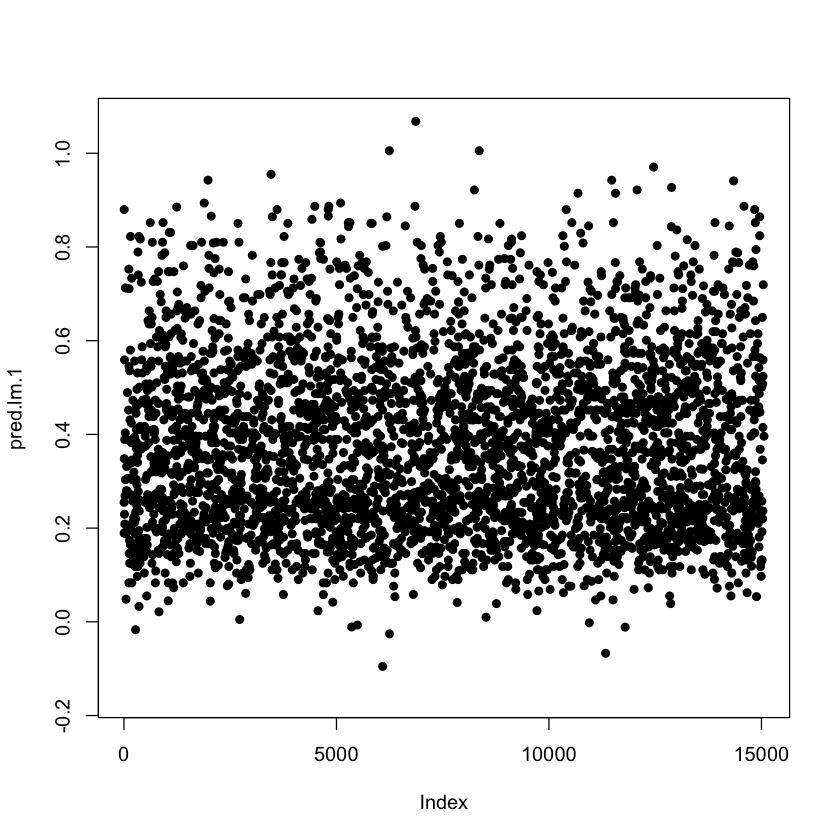

In [67]:
plot(pred.lm.1, col=adult_test$income_binary, pch=16)

In [68]:
(confusion.matrix.lm.1 <- table(round(pred.lm.1), adult_test$income_binary))

   
        0     1
  0 10781  2742
  1   579   958

In [69]:
(stats.lm.1 <- caret::confusionMatrix(confusion.matrix.lm.1))

Confusion Matrix and Statistics

   
        0     1
  0 10781  2742
  1   579   958
                                          
               Accuracy : 0.7795          
                 95% CI : (0.7728, 0.7861)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : 2.085e-13       
                                          
                  Kappa : 0.259           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9490          
            Specificity : 0.2589          
         Pos Pred Value : 0.7972          
         Neg Pred Value : 0.6233          
             Prevalence : 0.7543          
         Detection Rate : 0.7159          
   Detection Prevalence : 0.8979          
      Balanced Accuracy : 0.6040          
                                          
       'Positive' Class : 0               
                                          

### Sex

In [70]:
model.lm.2 <- lm(income_binary ~ sex, data=adult_data)

In [71]:
pred.lm.2 <- predict(model.lm.2, adult_test)

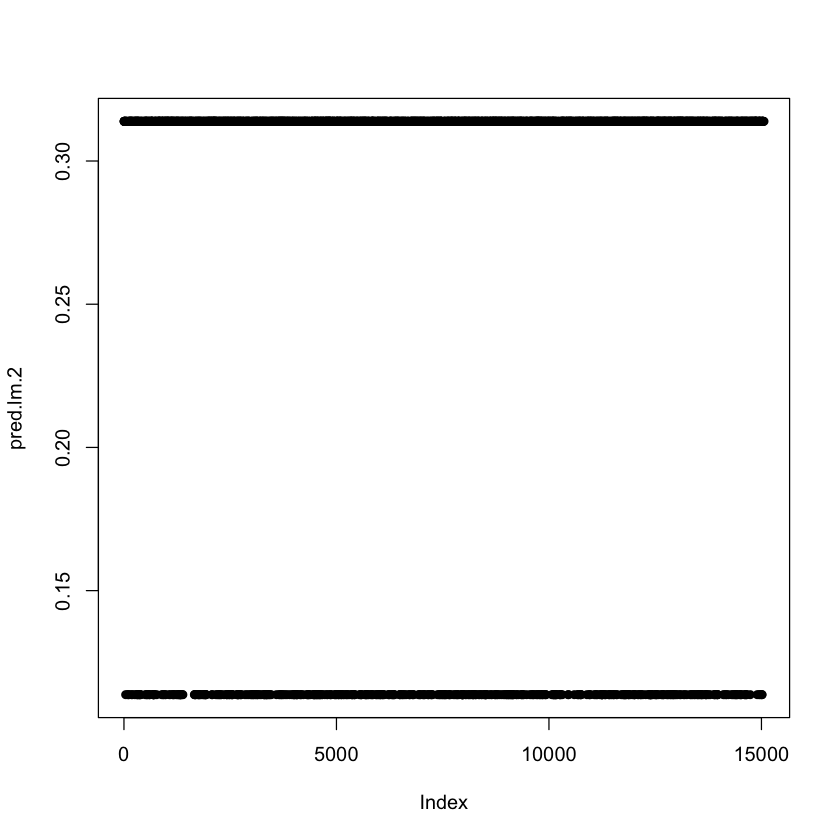

In [72]:
plot(pred.lm.2, col=adult_test$income_binary, pch=16)

In [73]:
(confusion.matrix.lm.2 <- table(round(pred.lm.2), adult_test$income_binary))

   
        0     1
  0 11360  3700

In [74]:
(stats.lm.2 <- caret::confusionMatrix(confusion.matrix.lm.2))

ERROR: Error in !all.equal(nrow(data), ncol(data)): niepoprawny typ argumentu


### Age, Education, Marital status, Relationship, Race, Sex

In [75]:
model.lm.3 <- lm(income_binary ~ age + education + marital.status + relationship + race + sex, data=adult_data)

In [76]:
pred.lm.3 <- predict(model.lm.3, adult_test)

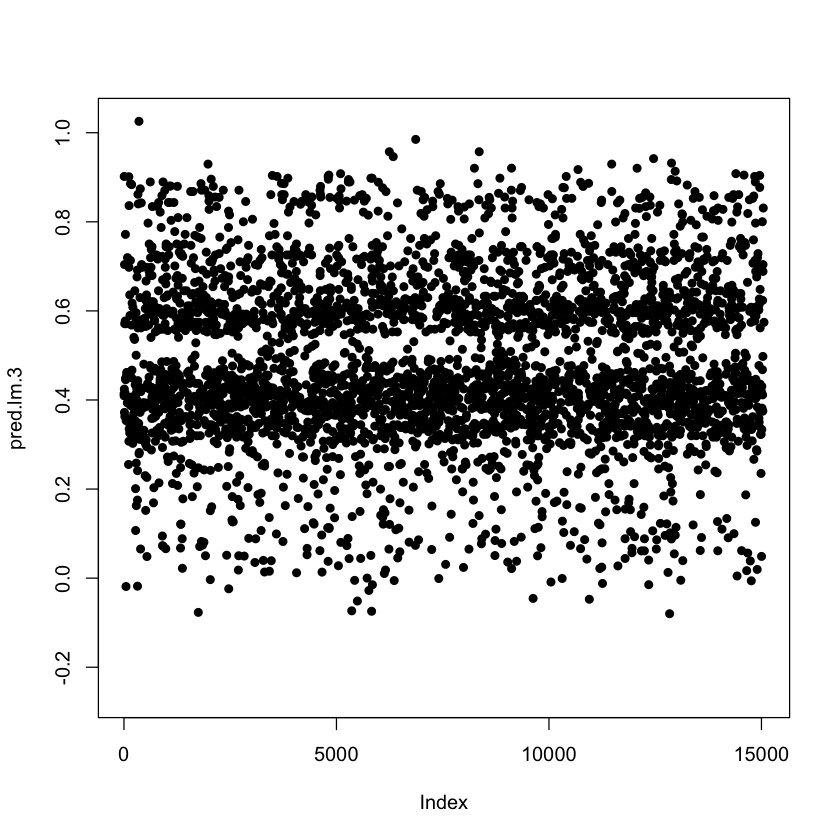

In [77]:
plot(pred.lm.3, col=adult_test$income_binary, pch=16)

In [78]:
(confusion.matrix.lm.3 <- table(round(pred.lm.3), adult_test$income_binary))

   
        0     1
  0 10698  2114
  1   662  1586

In [79]:
(stats.lm.3 <- caret::confusionMatrix(confusion.matrix.lm.3))

Confusion Matrix and Statistics

   
        0     1
  0 10698  2114
  1   662  1586
                                          
               Accuracy : 0.8157          
                 95% CI : (0.8094, 0.8218)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4268          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9417          
            Specificity : 0.4286          
         Pos Pred Value : 0.8350          
         Neg Pred Value : 0.7055          
             Prevalence : 0.7543          
         Detection Rate : 0.7104          
   Detection Prevalence : 0.8507          
      Balanced Accuracy : 0.6852          
                                          
       'Positive' Class : 0               
                                          

### ALL

In [94]:
model.lm.all <- lm(income_binary ~ ., data=adult_data)

Warning message:
“W poleceniu 'lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...)':
 dodatkowy argument ‘family’ zostanie odrzucony”


In [81]:
pred.lm.all <- predict(model.lm.all, adult_test)

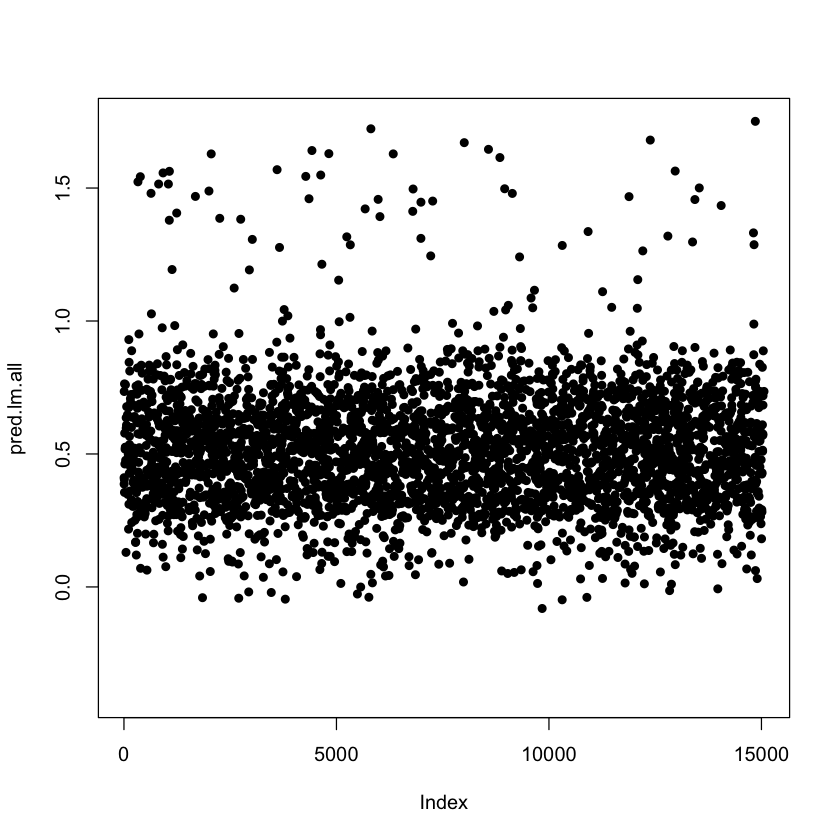

In [83]:
plot(pred.lm.all, col=adult_test$income_binary, pch=16)

In [86]:
(confusion.matrix.lm.all <- table(round(pred.lm.all), adult_test$income_binary))

   
        0     1
  0 10684  1799
  1   676  1880
  2     0    21

In [87]:
(stats.lm.all <- caret::confusionMatrix(confusion.matrix.lm.all))

ERROR: Error in !all.equal(nrow(data), ncol(data)): niepoprawny typ argumentu


# GLM

In [80]:
model.glm.all <- glm(income_binary ~ ., data=adult_data, family = "binomial")

In [81]:
summary(adult_data$income_binary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2489  0.0000  1.0000 

In [82]:
summary(adult_test$income_binary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2457  0.0000  1.0000 

In [83]:
pred.glm.all <- predict(model.glm.all, adult_test, type = "response")

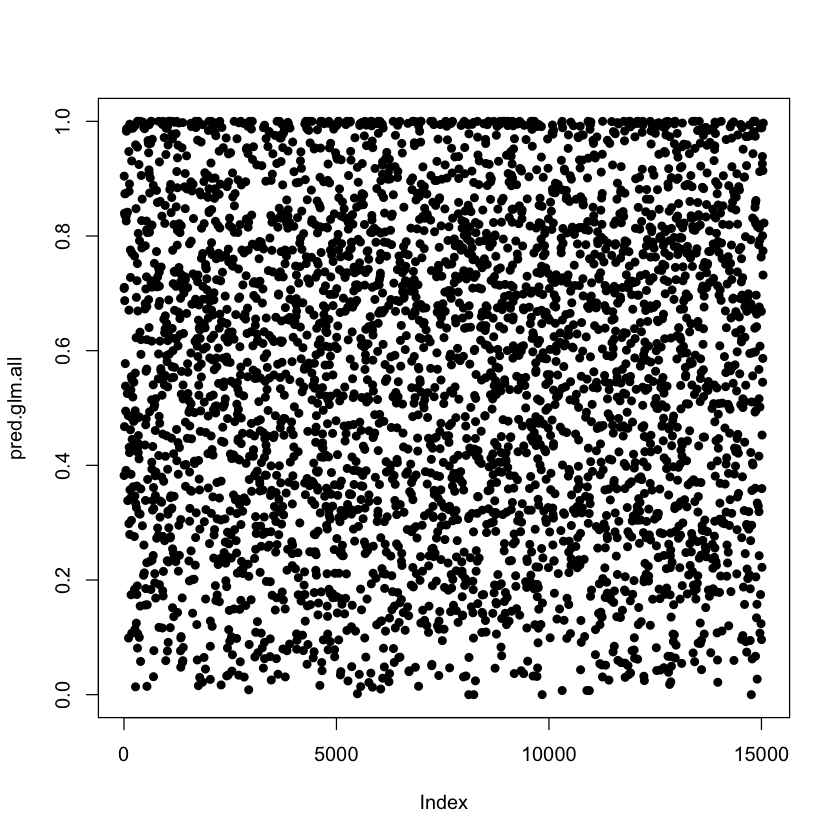

In [84]:
plot(pred.glm.all, col=true.labels, pch=16)

In [85]:
(confusion.matrix.glm.all <- table(round(pred.glm.all), true.labels))

   true.labels
        0     1
  0 10509  1510
  1   851  2190

In [86]:
(stats.glm.all <- caret::confusionMatrix(confusion.matrix.glm.all))

Confusion Matrix and Statistics

   true.labels
        0     1
  0 10509  1510
  1   851  2190
                                         
               Accuracy : 0.8432         
                 95% CI : (0.8373, 0.849)
    No Information Rate : 0.7543         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.55           
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9251         
            Specificity : 0.5919         
         Pos Pred Value : 0.8744         
         Neg Pred Value : 0.7202         
             Prevalence : 0.7543         
         Detection Rate : 0.6978         
   Detection Prevalence : 0.7981         
      Balanced Accuracy : 0.7585         
                                         
       'Positive' Class : 0              
                                         

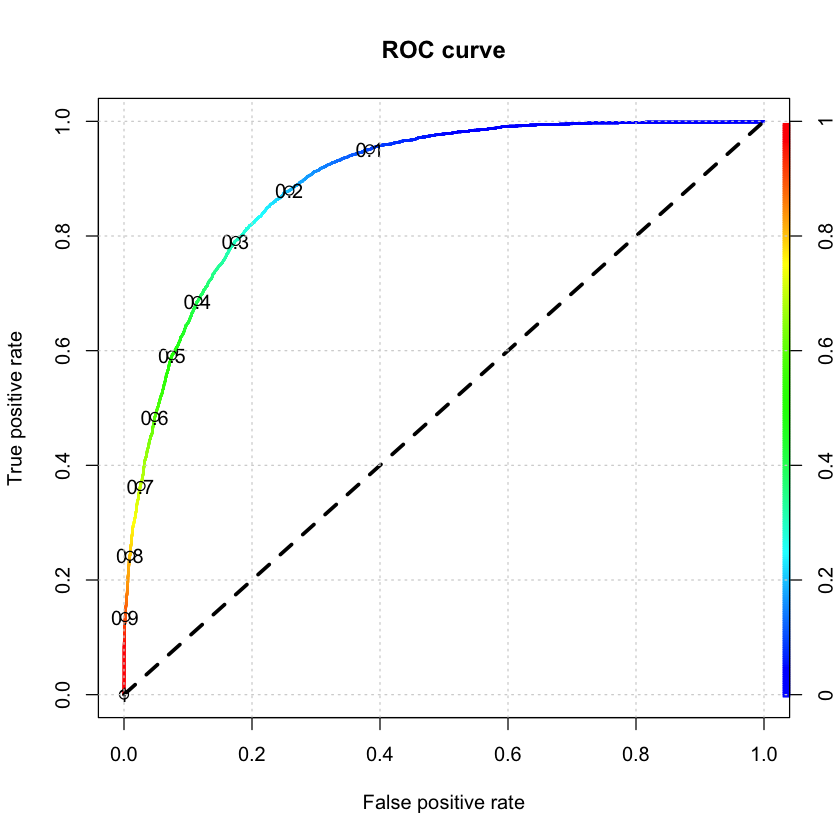

In [87]:
pred.ROCR.logit <- prediction(pred.glm.all, true.labels)
perf.ROCR.logit <- performance(pred.ROCR.logit, "tpr", "fpr")

# fancy ROC curve
plot(perf.ROCR.logit, print.cutoffs.at=seq(0.1, 1, 0.1), colorize=TRUE, lwd=2)
# add ROC curve for random classifier
lines(c(0,1), c(0,1), lwd=3, lty=2)
grid()
title("ROC curve")

In [88]:
(prop.table(table(true.labels)))

true.labels
        0         1 
0.7543161 0.2456839 

## k-NN 

In [120]:
(n <- dim(adult_data)[1])

[1] 30161

In [119]:
(n.test <- dim(adult_test)[1])

[1] 15060

In [87]:
sum(is.na(adult_data))

[1] 0

### All

In [116]:
model.knn.all <- ipredknn(income_binary ~ . , data=adult_data, k=5)

In [117]:
predicted.labels.knn.all <- predict(model.knn.all, adult_test, type="class")

In [118]:
(confusion.matrix.knn.all <- table(predicted.labels.knn.all, adult_test$income_binary))

                        
predicted.labels.knn.all     0     1
                       0 10344  1375
                       1  1016  2325

In [121]:
(n.test - sum(diag(confusion.matrix.knn.all))) / n.test

[1] 0.1587649

In [122]:
knn.all <- caret::confusionMatrix(confusion.matrix.knn.all)
knn.all

Confusion Matrix and Statistics

                        
predicted.labels.knn.all     0     1
                       0 10344  1375
                       1  1016  2325
                                         
               Accuracy : 0.8412         
                 95% CI : (0.8353, 0.847)
    No Information Rate : 0.7543         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5572         
                                         
 Mcnemar's Test P-Value : 2.454e-13      
                                         
            Sensitivity : 0.9106         
            Specificity : 0.6284         
         Pos Pred Value : 0.8827         
         Neg Pred Value : 0.6959         
             Prevalence : 0.7543         
         Detection Rate : 0.6869         
   Detection Prevalence : 0.7782         
      Balanced Accuracy : 0.7695         
                                         
       'Positive' Class : 0      

### Age, Education, Marital status, Relationship, Race, Sex

In [123]:
model.knn.1 <- ipredknn(income_binary ~ age + education + marital.status + relationship + race + sex , data=adult_data, k=5)

In [124]:
predicted.labels.1 <- predict(model.knn.1,adult_test, type="class")

In [125]:
(confusion.matrix.knn1 <- table(predicted.labels.1, adult_test$income_binary))

                  
predicted.labels.1     0     1
                 0 10255  1759
                 1  1105  1941

In [126]:
(n.test - sum(diag(confusion.matrix.knn1))) / n.test

[1] 0.1901726

In [127]:
knn.1 <- caret::confusionMatrix(confusion.matrix.knn1)
knn.1

Confusion Matrix and Statistics

                  
predicted.labels.1     0     1
                 0 10255  1759
                 1  1105  1941
                                          
               Accuracy : 0.8098          
                 95% CI : (0.8035, 0.8161)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4544          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9027          
            Specificity : 0.5246          
         Pos Pred Value : 0.8536          
         Neg Pred Value : 0.6372          
             Prevalence : 0.7543          
         Detection Rate : 0.6809          
   Detection Prevalence : 0.7977          
      Balanced Accuracy : 0.7137          
                                          
       'Positive' Class : 0           

### Age & Education

In [129]:
model.knn.2 <- ipredknn(income_binary ~ age + education, data=adult_data, k=5)

In [130]:
predicted.labels.2 <- predict(model.knn.2,adult_test, type="class")

In [131]:
(confusion.matrix.knn2 <- table(predicted.labels.2, adult_test$income_binary))

                  
predicted.labels.2     0     1
                 0 10520  2431
                 1   840  1269

In [132]:
(accuracy.knn2 <- sum(diag(confusion.matrix.knn2))/sum(confusion.matrix.knn2))

[1] 0.7828021

In [133]:
knn.2 <- caret::confusionMatrix(confusion.matrix.knn2)
knn.2

Confusion Matrix and Statistics

                  
predicted.labels.2     0     1
                 0 10520  2431
                 1   840  1269
                                          
               Accuracy : 0.7828          
                 95% CI : (0.7761, 0.7894)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3146          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9261          
            Specificity : 0.3430          
         Pos Pred Value : 0.8123          
         Neg Pred Value : 0.6017          
             Prevalence : 0.7543          
         Detection Rate : 0.6985          
   Detection Prevalence : 0.8600          
      Balanced Accuracy : 0.6345          
                                          
       'Positive' Class : 0           

### Age

In [134]:
model.knn.3 <- ipredknn(income_binary ~ age, data=adult_data, k=1)

In [135]:
predicted.labels.3 <- predict(model.knn.3,adult_test, type="class")

In [136]:
(confusion.matrix.knn3 <- table(predicted.labels.3, adult_test$income_binary))

                  
predicted.labels.3     0     1
                 0 11360  3700
                 1     0     0

In [137]:
(accuracy.knn3 <- sum(diag(confusion.matrix.knn3))/sum(confusion.matrix.knn3))

[1] 0.7543161

In [138]:
knn.3 <- caret::confusionMatrix(confusion.matrix.knn3)
knn.3

Confusion Matrix and Statistics

                  
predicted.labels.3     0     1
                 0 11360  3700
                 1     0     0
                                          
               Accuracy : 0.7543          
                 95% CI : (0.7474, 0.7612)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : 0.5044          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7543          
         Neg Pred Value :    NaN          
             Prevalence : 0.7543          
         Detection Rate : 0.7543          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0           

# Caret

In [16]:
prop.table(table(adult_data$income_binary))
prop.table(table(adult_test$income_binary))


        0         1 
0.7510693 0.2489307 


        0         1 
0.7543161 0.2456839 

# Random Forest

## ALL

### mtry

In [107]:
rf.all <- randomForest(as.factor(income_binary)~., data=adult_data,
                        ntree=300, maxnodes=20)

In [108]:
rf.all


Call:
 randomForest(formula = as.factor(income_binary) ~ ., data = adult_data,      ntree = 300, maxnodes = 20) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 15.45%
Confusion matrix:
      0    1 class.error
0 21755  898  0.03964155
1  3763 3745  0.50119872

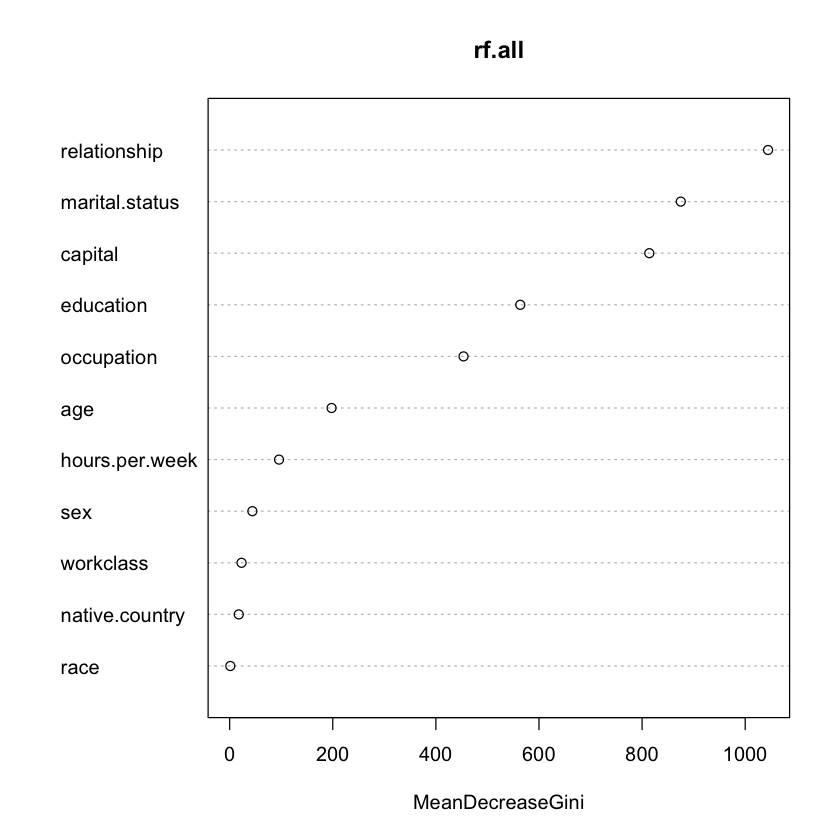

In [109]:
varImpPlot(rf.all)

In [110]:
predict.rf.all <- predict(rf.all,adult_test, type="class")

ERROR: Error in predict.randomForest(rf.all, adult_test, type = "class"): Type of predictors in new data do not match that of the training data.


In [111]:
# (confusion.matrix.rf.all <- table(predict.rf.all, adult_test$income_binary))

In [111]:
rf.all <- caret::confusionMatrix(confusion.matrix.rf.all)
rf.all

Confusion Matrix and Statistics

              
predict.rf.all    0    1
             0 6788    0
             1    0 2248
                                     
               Accuracy : 1          
                 95% CI : (0.9996, 1)
    No Information Rate : 0.7512     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.7512     
         Detection Rate : 0.7512     
   Detection Prevalence : 0.7512     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

## Age

In [89]:
rf.age <- randomForest(as.factor(income_binary)~age, data=adult_data, ntree=100, maxnodes=10)

In [90]:
rf.age


Call:
 randomForest(formula = as.factor(income_binary) ~ age, data = adult_data,      ntree = 100, maxnodes = 10) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 1

        OOB estimate of  error rate: 24.89%
Confusion matrix:
      0 1 class.error
0 22653 0           0
1  7508 0           1

In [91]:
predict.rf.1 <- predict(rf.age,adult_test, type="class")

In [92]:
(confusion.matrix.rf1 <- table(predict.rf.1, adult_test$income_binary))

            
predict.rf.1     0     1
           0 11360  3700
           1     0     0

In [93]:
rf.1 <- caret::confusionMatrix(confusion.matrix.rf1)
rf.1

Confusion Matrix and Statistics

            
predict.rf.1     0     1
           0 11360  3700
           1     0     0
                                          
               Accuracy : 0.7543          
                 95% CI : (0.7474, 0.7612)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : 0.5044          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7543          
         Neg Pred Value :    NaN          
             Prevalence : 0.7543          
         Detection Rate : 0.7543          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                   

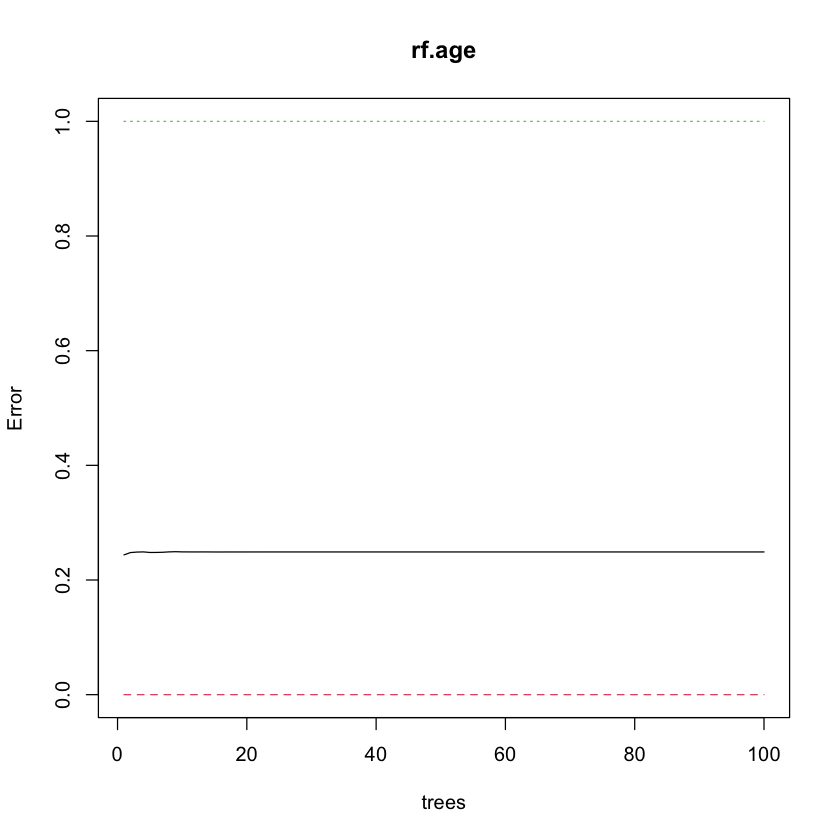

In [94]:
plot(rf.age)

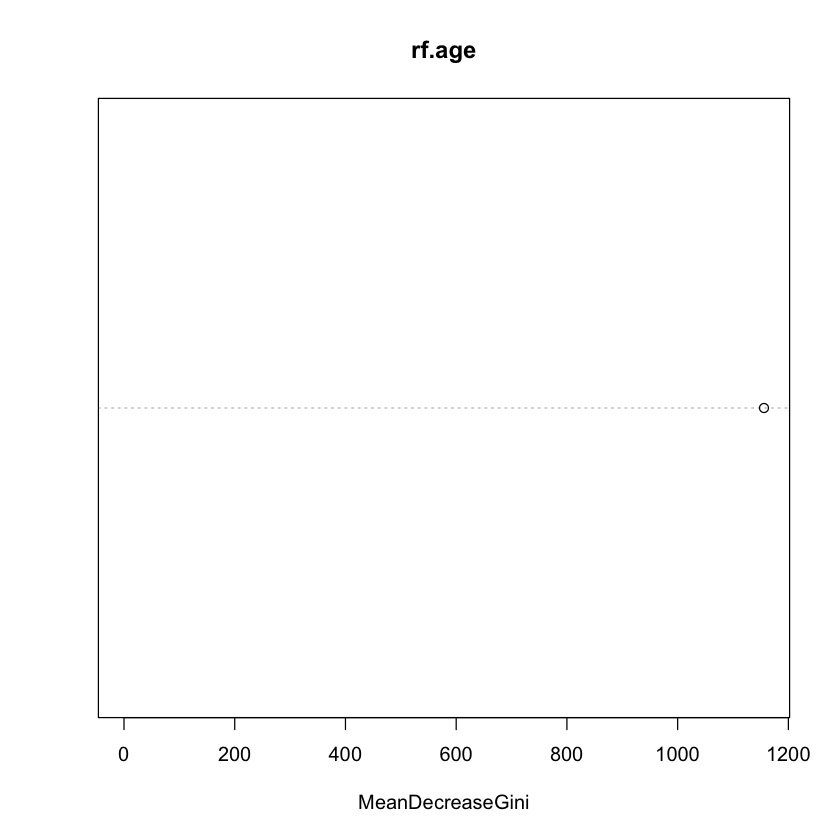

In [95]:
varImpPlot(rf.age)

## Age, education, marital, relationship, race, sex

In [102]:
rf.2 <- randomForest(as.factor(income_binary)~ age + education + marital.status + relationship + race + sex, data=adult_data, 
                         ntree=100, maxnodes=5)

In [103]:
predict.rf.2 <- predict(rf.2, adult_test, type="class")

In [104]:
(confusion.matrix.rf2 <- table(predict.rf.2, adult_test$income_binary))

            
predict.rf.2     0     1
           0 10898  2328
           1   462  1372

In [105]:
rf.matrix.2 <- caret::confusionMatrix(confusion.matrix.rf2)
rf.matrix.2

Confusion Matrix and Statistics

            
predict.rf.2     0     1
           0 10898  2328
           1   462  1372
                                          
               Accuracy : 0.8147          
                 95% CI : (0.8084, 0.8209)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3978          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9593          
            Specificity : 0.3708          
         Pos Pred Value : 0.8240          
         Neg Pred Value : 0.7481          
             Prevalence : 0.7543          
         Detection Rate : 0.7236          
   Detection Prevalence : 0.8782          
      Balanced Accuracy : 0.6651          
                                          
       'Positive' Class : 0               
                   

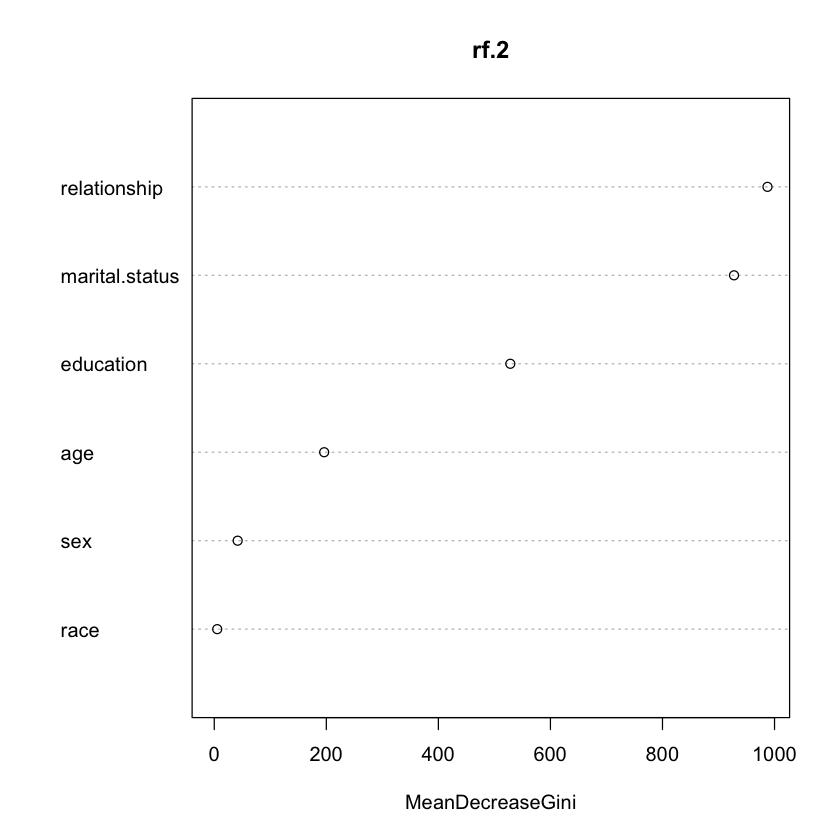

In [106]:
varImpPlot(rf.2)